In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [ ]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [ ]:
data_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [ ]:
data_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [ ]:
data_fake["class"]=0
data_true["class"]=1

In [ ]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [ ]:
data_fake = data_fake.iloc[:-10]
data_true = data_true.iloc[:-10]

In [ ]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [ ]:
data_merge = pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   
5   Racist Alabama Cops Brutalize Black Boy While...   
6   Fresh Off The Golf Course, Trump Lashes Out A...   
7   Trump Said Some INSANELY Racist Stuff Inside ...   
8   Former CIA Director Slams Trump Over UN Bully...   
9   WATCH: Brand-New Pro-Trump Ad Features So Muc...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   
5  The number of cases of cops brutalizing and ki...    News   
6  Donald Trump spent a good portion of his day a...    News   
7  In the wake of yet another court decision that...    News   
8  Many people have raised the alarm regarding th...    News   
9  Just when you might have thought we d get a br...    News   

                date  class  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
5  December 25, 2017      0  
6  December 23, 2017      0  
7  December 23, 2017      0  
8  December 22, 2017      0  
9  December 21, 2017      0

In [ ]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
data = data_merge.drop([ 'title', 'subject', 'date'], axis = 1)

In [ ]:
data.isnull().sum()

In [ ]:
data = data.sample(frac =1)

In [ ]:
data.head()

text  class
11203  WASHINGTON - The chairman of a U.S. House comm...      1
5965   WASHINGTON (Reuters) - The Trump administratio...      1
15610  How many American taxpayer dollars have alread...      0
16790  BAGHDAD (Reuters) - Gorran, a main opposition ...      1
15135  BEIJING/NEW DELHI (Reuters) - As U.S. Presiden...      1

In [ ]:
data.reset_index(inplace = True)
data.drop(['index'],axis = 1, inplace = True)

In [ ]:
data.columns

Index(['text', 'class'], dtype='object')

In [ ]:
data.head()

text  class
0  WASHINGTON (Reuters) - Democratic election vic...      1
1   Thank you, President Trump, for those words o...      0
2  BRUSSELS (Reuters) - U.S. President Donald Tru...      1
3  President Donald Trump said his administration...      0
4  WASHINGTON (Reuters) - Having Republicans cont...      1

In [ ]:
def wordopt(text):
    text = text.lower()  # to convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # to remove text inside brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # to remove URLs
    text = re.sub(r'<.*?>+', '', text)  # to remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # to remove punctuation
    text = re.sub(r'\n', ' ', text)  # to replace newlines with spaces
    text = re.sub(r'\b\w*\d\w*\b', '', text)  # to remove words with numbers
    return text.strip()  # to remove leading/trailing spaces

In [ ]:
data['text'] = data['text'].apply(wordopt)

In [ ]:
x = data['text']
y = data['class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [ ]:
pred_lr =  LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9858288770053476

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5904
           1       0.98      0.99      0.99      5316

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt =  DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9955436720142602

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5904
           1       1.00      0.99      1.00      5316

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gb = GB.predict(xv_test)

In [ ]:
GB.score(xv_test, y_test)

0.9950980392156863

In [ ]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5904
           1       0.99      1.00      0.99      5316

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rf = RF.predict(xv_test)

In [ ]:
RF.score(xv_test, y_test)

0.9841354723707665

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5904
           1       0.98      0.98      0.98      5316

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



In [ ]:
from sklearn.svm import SVC
SV = SVC(kernel='linear', random_state=0)
SV.fit(xv_train, y_train)

NameError: name 'xv_train' is not defined

In [ ]:
pred_sv = SV.predict(xv_test)

In [ ]:
SV.score(xv_test, y_test)

0.9939393939393939

In [ ]:
print(classification_report(y_test, pred_sv))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5841
           1       0.99      0.99      0.99      5379

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
!pip install wordcloud

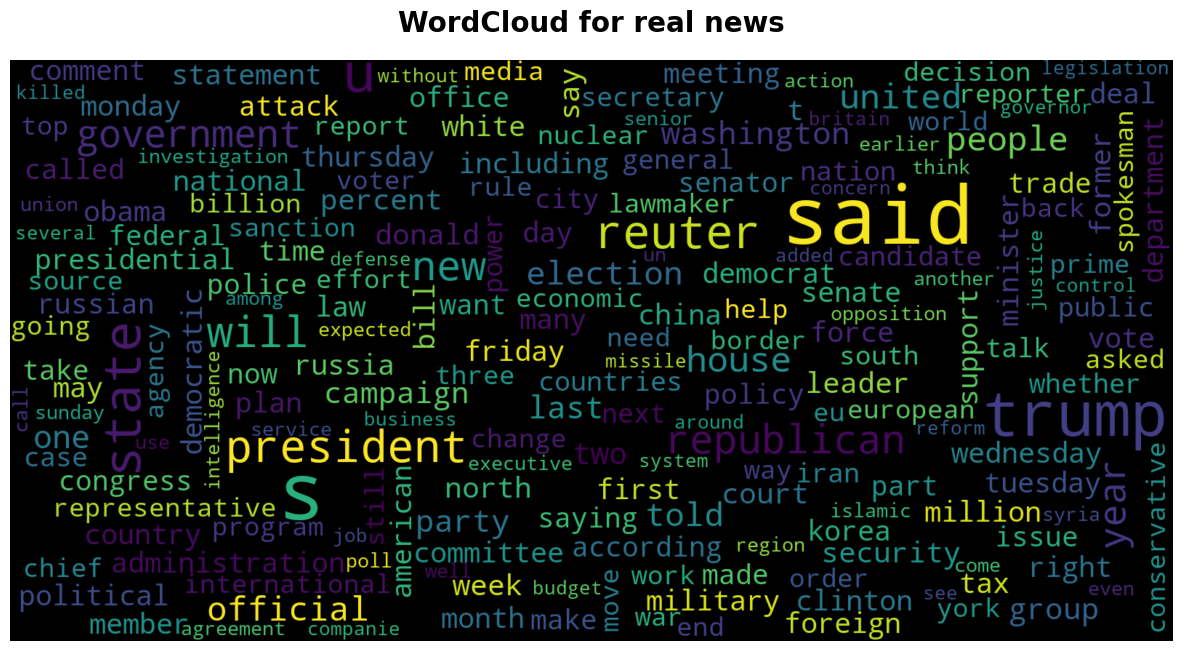

In [ ]:
### WC For real
from wordcloud import WordCloud
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for real news", fontsize=20, fontweight='bold', pad=20)
plt.show()

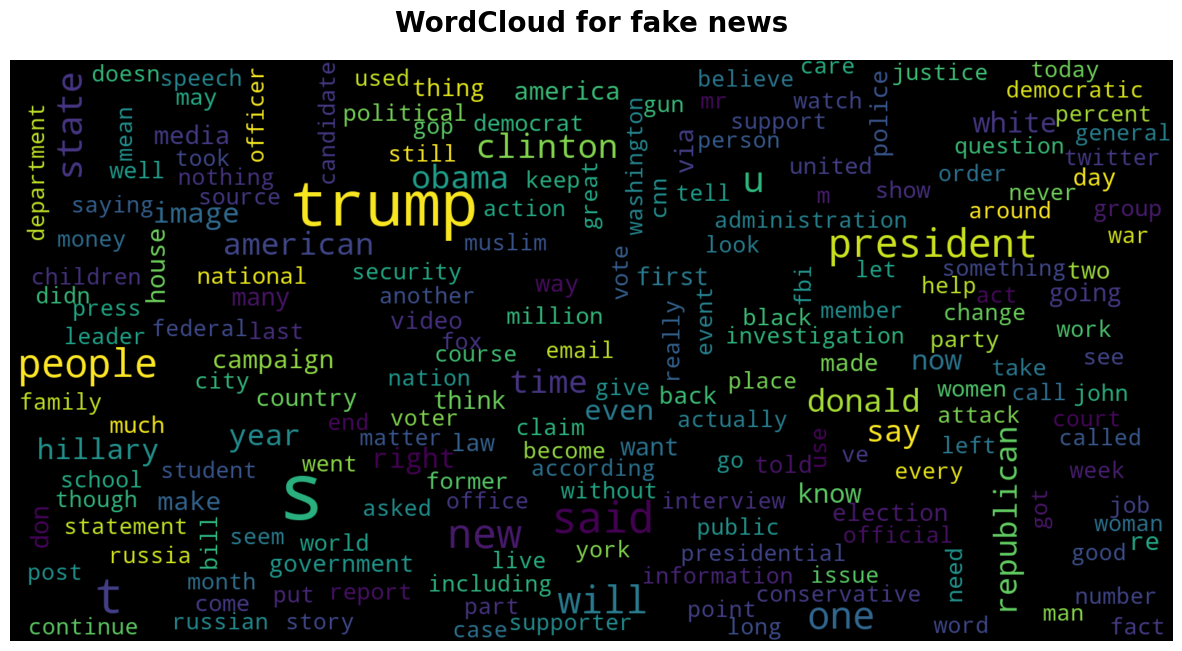

In [ ]:
### WC for fake
from wordcloud import WordCloud
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for fake news", fontsize=20, fontweight='bold', pad=20)
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

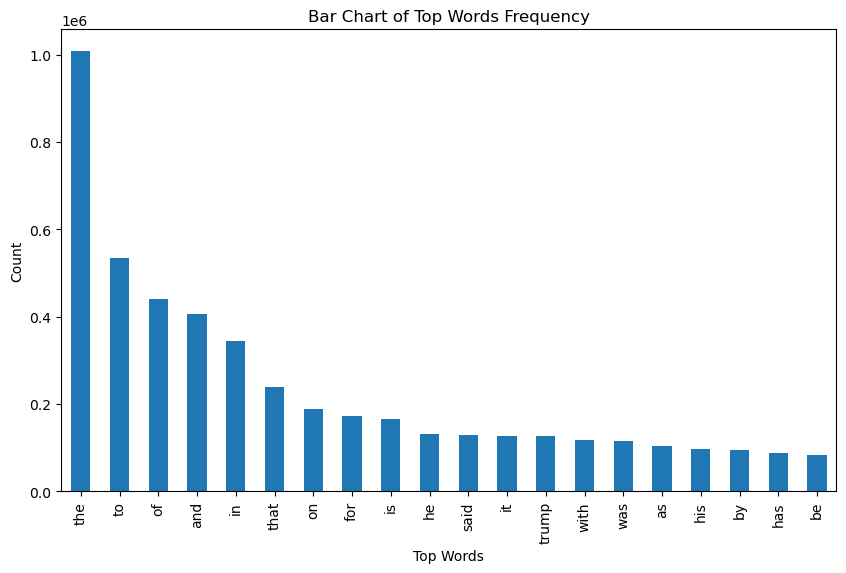

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [ ]:
def output_label(n):
    return "Fake News" if n == 0 else "Real News"
def manual_testing(news):
    new_xv_test = vectorization.transform([news])
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GB.predict(new_xv_test)
    pred_RFC = RF.predict(new_xv_test)
    pred_SVM = SV.predict(new_xv_test)

    print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nSVM Prediction: {}".format(output_label(pred_LR[0]),
                                                                                                                            output_label(pred_DT[0]),
                                                                                                                            output_label(pred_GBC[0]),
                                                                                                                            output_label(pred_RFC[0]),
                                                                                                                            output_label(pred_SVM[0])))

In [ ]:
news = str(input())
manual_testing(news)

 The Pentagon is considering a Boeing proposal to supply Ukraine with cheap, small precision bombs fit ted on to abundantly available rockets, allowing Kyiv to strike far behind Russian lines, according t No a Reuters report. US and allied military inventories are shrinking, and Ukraine faces an increasin g need for more sophisticated weapons as the war drags on. Boeing's proposed system, dubbed Ground-La unched Small Diameter Bomb (GLSDB), is one of about a half-dozen plans for getting new munitions into production for Ukraine and America's eastern European allies, industry sources told the news agency. GLSDB could be delivered as early as spring 2023, according to a document reviewed by Reuters and thr ee people familiar with the plan. It combines the GBU-39 Small Diameter Bomb (SDB) with the M26 rocke t motor, both of which are common in US inventories. Although a handful of GLSDB units have already been made, there are many logistical obstacles to formal procurement. The Boeing pla



LR Prediction: Real News 
DT Prediction: Real News 
GBC Prediction: Real News 
RFC Prediction: Real News 
SVM Prediction: Real News


In [ ]:
news = str(input())
manual_testing(news)

  Pro-Russian users have often repeated the Kremtin's original position that the invasion of Ukraine is a "special military operation" to "denazify" and "demilitarise" a "Neo-Nazi state". Many have downpl ayed allegations of Russian war crimes or even claimed that the war is a supposed "hoax". In one wid ely shared video, a news reporter could be seen standing in front of lines of body bags, one of which was moving. However, the footage did not show invented war casualties in Ukraine, but a "Fridays for Future" climate change protest in Vienna in February, three weeks before the invasion began. Days la ter, another viral video of a mannequin claimed to be proof that Ukrainian authorities had "staged" t he mass killing of civilians in the town of Bucha. The misleading clip showed a prosthetic doll bein g dressed and prepared by two men. Nadezhda, an assistant director for a Russian television programm e, confirmed to Euronews that the video showed their film set near St. Petersburg and 



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News 
SVM Prediction: Fake News


In [ ]:
!pip install lime

In [ ]:
from lime.lime_text import LimeTextExplainer

In [ ]:
explainer = LimeTextExplainer(class_names=["Real", "Fake"])
def predictor(texts):
    return DT.predict_proba(vectorization.transform(texts))
idx = np.random.randint(0, x_test.shape[0])
text_instance = x_test.iloc[idx]
print(f"Text: {text_instance}")
print(f"Actual Class: {y_test.iloc[idx]}")
exp = explainer.explain_instance(text_instance, predictor, num_features=10)
exp.show_in_notebook(text=True)

Text: los teques venezuela reuters  venezuelan siblings jeremias  and victoria  were in their pajamas and preparing to go to bed when a tear gas canister smashed through their family s kitchen window in early july  national guard soldiers were pelting the building in this highland town near caracas with tear gas canisters as they searched for opposition activists who had been protesting against unpopular president nicolas maduro for over three months amid screams and insults from neighbors soldiers stormed the building and arrested dozens of youths according to the children s mother gabriela  gabriela and her husband yorth hid the kids in their bedroom closet as the apartment filled with thick gas after seven canisters crashed in the guards did not enter their apartment but the family was unable to sleep that night and the apartment reeked for days  after that the kids changed  jeremias cried and begged to leave venezuela his younger sister previously not even scared of the dark was te

In [ ]:
explainer = LimeTextExplainer(class_names=["Real", "Fake"])
def predictor(texts):
    return LR.predict_proba(vectorization.transform(texts))
idx = np.random.randint(0, x_test.shape[0])
text_instance = x_test.iloc[idx]
print(f"Text: {text_instance}")
print(f"Actual Class: {y_test.iloc[idx]}")
exp = explainer.explain_instance(text_instance, predictor, num_features=10)
exp.show_in_notebook(text=True)

Text: washington reuters  a bipartisan group of lawmakers in the us senate and house of representatives introduced bills on wednesday to toughen us foreign investment rules amid growing concern about chinese efforts to buy us hightech companies senator john cornyn a member of the republican leadership who is on the senate intelligence committee introduced a senate bill to broaden the government’s power to stop foreign purchases of us firms by strengthening the committee on foreign investment in the united states cfius representative robert pittenger a north carolina republican introduced an identical bill in the us house of representatives both bills have republican and democratic cosponsors “this bill focuses on providing cfius with updated tools to address present and future security needs” said senator dianne feinstein a california democrat “senator cornyn and i have been working on this bill for the last eight months and we hope to build on the progress we’ve already made to update

In [ ]:
explainer = LimeTextExplainer(class_names=["Real", "Fake"])
def predictor(texts):
    return SV.predict_proba(vectorization.transform(texts))
idx = np.random.randint(0, x_test.shape[0])
text_instance = x_test.iloc[idx]
print(f"Text: {text_instance}")
print(f"Actual Class: {y_test.iloc[idx]}")
exp = explainer.explain_instance(text_instance, predictor, num_features=10)
exp.show_in_notebook(text=True)

Text: washington reuters  the us congress will allow a deadline on reimposing sanctions on iran to pass this week congressional and white house aides said on tuesday leaving a pact between world powers and tehran intact at least temporarily in october trump declined to certify that iran was complying with the nuclear agreement reached among tehran the united states and others in  his decision triggered a  window for congress to decide whether to bring back sanctions on iran congressional leaders have announced no plans to introduce a resolution to reimpose sanctions before wednesday’s deadline and aides say lawmakers will let the deadline pass without action by doing that congress passes the ball back to trump who must decide in midjanuary if he wants to continue to waive energy sanctions on iran trump’s failure to do so would blow apart the deal a course opposed by european allies russia and china the other parties to the accord under which iran got sanctions relief in return for curb

AttributeError: This 'SVC' has no attribute 'predict_proba'

In [ ]:
explainer = LimeTextExplainer(class_names=["Real", "Fake"])
def predictor(texts):
    return GB.predict_proba(vectorization.transform(texts))
idx = np.random.randint(0, x_test.shape[0])
text_instance = x_test.iloc[idx]
print(f"Text: {text_instance}")
print(f"Actual Class: {y_test.iloc[idx]}")
exp = explainer.explain_instance(text_instance, predictor, num_features=10)
exp.show_in_notebook(text=True)

Text: washington reuters  the us house of representatives voted down on monday a measure that would have compelled cell phone carriers to disclose a phone’s location with law enforcement in the event of an emergency amid a lastminute lobbying effort from privacy advocates opposed to it lawmakers voted  to pass the kelsey smith act falling short of the twothirds threshold necessary due to rules invoked to expedite the bill’s vote the rejection was considered surprising as house leadership rarely schedules a vote on legislation it is not confident will pass however civil liberties groups aggressively opposed the bill on monday arguing that while well intended it would create a warrant loophole and could lead to expanded government surveillance  r street a libertarianleaning think tank said phone companies already possess the authority to share cell phone location data in emergency situations and did so frequently making the legislation largely unnecessary the bill is named after a deceas

In [ ]:
explainer = LimeTextExplainer(class_names=["Real", "Fake"])
def predictor(texts):
    return RF.predict_proba(vectorization.transform(texts))
idx = np.random.randint(0, x_test.shape[0])
text_instance = x_test.iloc[idx]
print(f"Text: {text_instance}")
print(f"Actual Class: {y_test.iloc[idx]}")
exp = explainer.explain_instance(text_instance, predictor, num_features=10)
exp.show_in_notebook(text=True)

Text: paris reuters  never let it be said that president emmanuel macron doesn t care about how he comes across for the first television interview of his fivemonthold presidency an hourlong appearance on france s  during sunday primetime everything on screen seemed scrupulously chosen to highlight elements of the  s education world view and ambitions for france seated at a marbletopped designer table three interviewers on the other side macron had on the wall over his shoulder a large modernist painting with the words  liberte egalite fraternite   the national motto  arranged around the french flag and an image of marianne the national symbol   while the interview took place in the gilded classical elysee palace home to french presidents since  macron and his wife brigitte have updated many of the rooms with contemporary art designer rugs and angular metal furniture on his office desk from where one of several cameras provided a wideangle of the scene the titles of books macron is supp